In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\Sabudh\AI for Book Analysis\Dataset\\final\jaykishan.csv")
df.head()

C:\Users\jpadi\AppData\Local\Temp\ipykernel_4772\4251557160.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Sabudh\AI for Book Analysis\Dataset\\final\jaykishan.csv")


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,#978177101,14,[],US,eng,"[{'count': '73', 'name': 'to-read'}, {'count':...",NaN,True,4.27,NaN,...,5.0,NaN,2013.0,https://www.goodreads.com/book/show/17788459-h...,https://images.gr-assets.com/books/1365768881m...,17788459,21,24878291,Heating Up Hawaii,Heating Up Hawaii
1,0000000021,6,[],US,NaN,"[{'count': '970', 'name': 'to-read'}, {'count'...",NaN,False,2.94,NaN,...,NaN,NaN,2007.0,https://www.goodreads.com/book/show/475846._,https://s.gr-assets.com/assets/nophoto/book/11...,475846,211,1509003,بامداد خمار,بامداد خمار
2,000004,11,[],US,eng,"[{'count': '67', 'name': 'to-read'}, {'count':...",NaN,True,3.70,NaN,...,10.0,1st Edition,2011.0,https://www.goodreads.com/book/show/12796937-a...,https://s.gr-assets.com/assets/nophoto/book/11...,12796937,30,17945127,An Insight into Men and Anal Sex,An Insight into Men and Anal Sex
3,0000629,27,['483987'],US,eng,"[{'count': '62', 'name': 'to-read'}, {'count':...",NaN,True,3.40,NaN,...,3.0,NaN,2013.0,https://www.goodreads.com/book/show/17453910-p...,https://images.gr-assets.com/books/1362180113m...,17453910,129,24343229,Pink Bunny Ears...Seriously? (Holiday Jobs tha...,Pink Bunny Ears...Seriously? (Holiday Jobs tha...
4,0000673,4,[],US,eng,"[{'count': '9', 'name': 'to-read'}, {'count': ...",NaN,True,3.20,NaN,...,8.0,NaN,2013.0,https://www.goodreads.com/book/show/18363508-a...,https://images.gr-assets.com/books/1377082998m...,18363508,15,25966225,A Perfect Match,A Perfect Match


We will be checking the general information of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167183 entries, 0 to 167182
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  167183 non-null  object 
 1   text_reviews_count    167183 non-null  int64  
 2   series                167183 non-null  object 
 3   country_code          167183 non-null  object 
 4   language_code         91734 non-null   object 
 5   popular_shelves       167183 non-null  object 
 6   asin                  0 non-null       float64
 7   is_ebook              167183 non-null  bool   
 8   average_rating        167183 non-null  float64
 9   kindle_asin           82614 non-null   object 
 10  similar_books         167183 non-null  object 
 11  description           167183 non-null  object 
 12  format                155017 non-null  object 
 13  link                  167183 non-null  object 
 14  authors               167183 non-null  object 
 15  

Finding out all the total amount of null entries in all columns.

In [5]:
df.isna().sum()

isbn                         0
text_reviews_count           0
series                       0
country_code                 0
language_code            75449
popular_shelves              0
asin                    167183
is_ebook                     0
average_rating               0
kindle_asin              84569
similar_books                0
description                  0
format                   12166
link                         0
authors                      0
publisher                12519
num_pages                25315
publication_day          27754
isbn13                    5040
publication_month        19913
edition_information     147118
publication_year         11307
url                          0
image_url                    0
book_id                      0
ratings_count                0
work_id                      0
title                        2
title_without_series         2
dtype: int64

Empty values displayed as percentage

Text(0.5, 0, 'Percentage Empty Values')

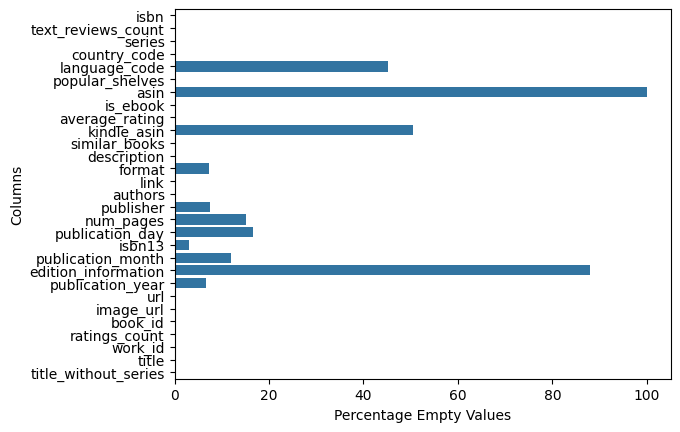

In [10]:
data = df.isna().sum()
percentage_val = data.values/len(df)*100
sns.barplot(y = data.index, x = percentage_val)
plt.ylabel('Columns')
plt.xlabel('Percentage Empty Values')

There are a large number of missing values in the following columns:
language_code
asin
kindle_asin
num_pages
publication_day
publication_month
edition_information

Unique values in country_code, language_code

In [16]:
print(df['country_code'].value_counts())
print('\n')
print(df['language_code'].value_counts())

country_code
US    167183
Name: count, dtype: int64


language_code
eng      63456
en-US     7503
spa       3111
ita       3077
en-GB     2490
         ...  
kau          1
pt-BR        1
jav          1
afr          1
es-MX        1
Name: count, Length: 77, dtype: int64


<Axes: xlabel='description', ylabel='Count'>

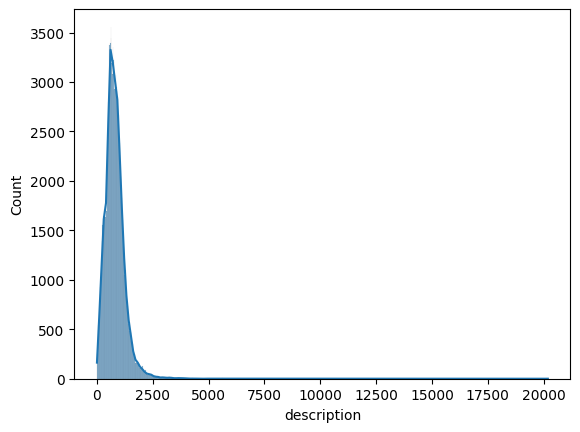

In [22]:
data = df['description'].str.len()
sns.histplot(data = data, kde=True)

Description peaks around 1000 words

Properties of all the numerical columns

array([[<Axes: title={'center': 'text_reviews_count'}>,
        <Axes: title={'center': 'average_rating'}>],
       [<Axes: title={'center': 'ratings_count'}>,
        <Axes: title={'center': 'num_pages'}>]], dtype=object)

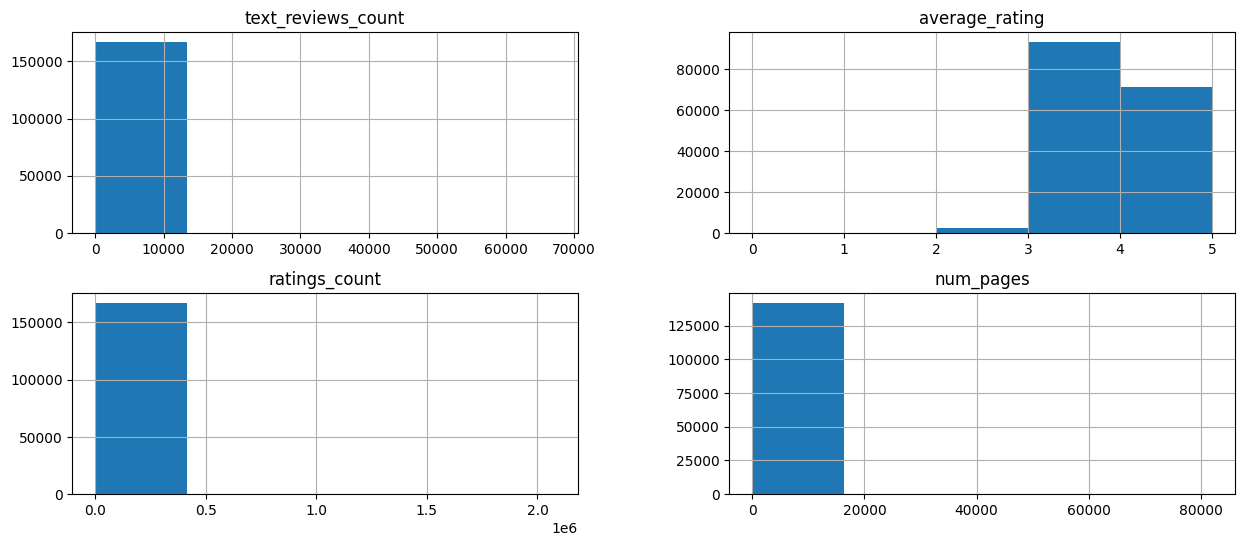

In [26]:
df[['text_reviews_count', 'average_rating', 'ratings_count', 'num_pages']].hist(bins = 5, figsize = (15, 6))


Correlation matrix of numerical columns

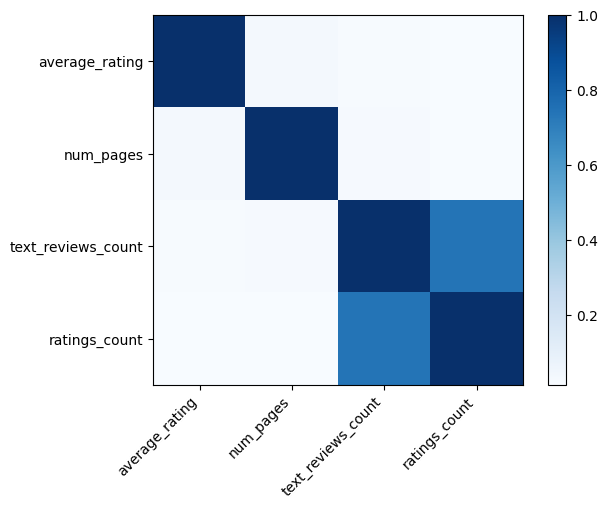

In [29]:
data = df[['average_rating', 'num_pages','text_reviews_count', 'ratings_count']]

matrix = data.corr()

# plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

There is a high collinearilty between text_reviews_count and ratings_count

Count of unique values

isbn                    145232
text_reviews_count        1524
series                   48441
country_code                 1
language_code               77
popular_shelves         108363
asin                         0
is_ebook                     2
average_rating             304
kindle_asin              57123
similar_books            54485
description             131827
format                     195
link                    145232
authors                  43257
publisher                14107
num_pages                 1098
publication_day             31
isbn13                  141166
publication_month           12
edition_information       8118
publication_year           137
url                     145232
image_url               101117
book_id                 145232
ratings_count             6362
work_id                  98801
title                   113648
title_without_series    113648
dtype: int64


<Axes: ylabel='None'>

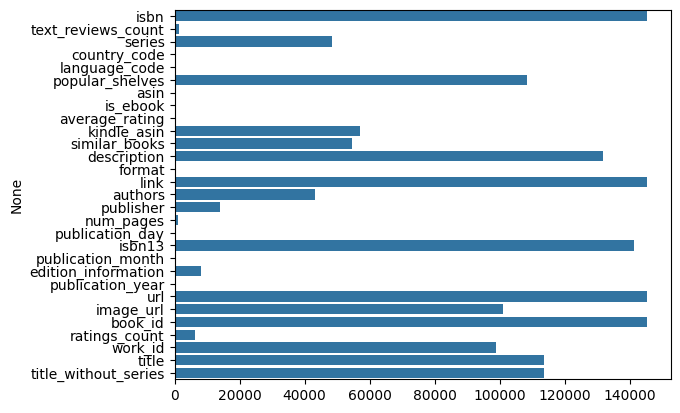

In [28]:
data = df.nunique()
print(data)

sns.barplot(y = data.index, x = data.values)

Analyzing the 'popular_shelves' column

In [31]:
data = df['popular_shelves']
data[0]

"[{'count': '73', 'name': 'to-read'}, {'count': '1', 'name': 'contemporary-romance'}, {'count': '1', 'name': 'carmen-falcone'}, {'count': '1', 'name': 'ebook'}, {'count': '1', 'name': 'alpha-bad-boy'}, {'count': '1', 'name': 'ced'}, {'count': '1', 'name': 'romance'}, {'count': '1', 'name': 'comptr-nook'}, {'count': '1', 'name': 'books'}, {'count': '1', 'name': 'my-library-list'}, {'count': '1', 'name': 'kindle'}, {'count': '1', 'name': 'ps'}, {'count': '1', 'name': 'published'}, {'count': '1', 'name': 'brittany-s-reviews'}, {'count': '1', 'name': 'stayed-up-all-night'}, {'count': '1', 'name': 'loved-this-book'}, {'count': '1', 'name': 'erotica'}, {'count': '1', 'name': 'ebm'}, {'count': '1', 'name': 'couldn-t-put-it-down'}, {'count': '1', 'name': 'alpha-male'}, {'count': '1', 'name': 'romance-2nd-chance'}, {'count': '1', 'name': 'love-the-cover'}, {'count': '1', 'name': 'hawaii'}, {'count': '1', 'name': 'droolworthy'}, {'count': '1', 'name': 'books-i-wrote'}, {'count': '1', 'name': 'co

It contains the amount of time a particular book has been added to a certain list

In [32]:
print(df.duplicated().value_counts())

False    145289
True      21894
Name: count, dtype: int64


There are 21894 duplicates present in the dataset.

Checking the correlation between 'isbn' and 'book_id'

In [33]:
def safe_numeric_convert(x):
    """Attempts to convert a value to numeric, returning NaN if unsuccessful."""
    try:
        return pd.to_numeric(x)
    except (ValueError, TypeError):
        return np.nan

df['isbn_numeric'] = df['isbn'].apply(safe_numeric_convert)
df['book_id_numeric'] = df['book_id'].apply(safe_numeric_convert)

# Calculate correlation on numeric columns
correlation = df['isbn_numeric'].corr(df['book_id_numeric'])
print(correlation)

0.13115362039161158


There is a very low correlation between the two columns, hence they are unrelated.